In [11]:
import pandas as pd
import numpy as np

def load_and_preprocess_data(filepath, date_col, value_col):
    """
    Load time series data
    Args:
        filepath (string): path to the file with time series data
        date_col (string): name of column containing time indexes of time series
        value_col (string): name of column containing values of time series

    Returns:
        pd.Series: series indexed by dates
    """
    df = pd.read_csv(filepath)
    df[date_col] = pd.to_datetime(df[date_col])  
    ts = pd.Series(df[value_col].values, index=df[date_col])
    return ts

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


def plot_time_series(data, title='Time Series Plot', xlabel='Date', ylabel='GDP'):
    """
    Plot the time series data.
    
    Args:
    - data (pd.Series): The time series data to plot.
    - title (str): Title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(10, 5))
    data.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def fit_ets_model(data, train_frac):
    """
    Fit an Exponential Smoothing (ETS) model to the training data.
    
    Args:
    - train_data (pd.Series): The time series data for training.
    
    Returns:
    - results: The fitted model results.
    """
    train_size = int(len(data) * train_frac)
    train, test = data.iloc[:train_size], data.iloc[train_size:]
    
    # Fit the ETS model on the training data
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4)
    results = model.fit()
    
    return results, train, test


def plot_forecast(train, test, predictions):
    """
    Plot the forecast against the actual test data.
    
    Args:
    - train (pd.DataFrame): Training dataset.
    - test (pd.DataFrame): Test dataset.
    - predictions (pd.Series): Forecasted values.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Sum'], label='Training Data')
    plt.plot(test.index, test['Sum'], label='Test Data')
    plt.plot(test.index, predictions, label='Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.title('Exponential Smoothing (ETS) Forecasting')
    plt.legend()
    plt.show()


def evaluate_forecast(test, predictions):
    """
    Calculate and print forecast accuracy metrics.
    Args:
        test (array): test data
        predictions (arrat): forecasted data
    """
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')



def plot_forecast_results(train, test, predictions, ylabel, title):
    """
    Plot training data, test data, and predictions.
    Args:
        train (array): train data
        test (array): test data
        predictions (array): forecasted data
        ylabel (string): label for y-axis
        title (string): plot title
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(predictions.index, predictions, label='Predicted', color='green')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


Mean Absolute Error (MAE): 3734372.28
Mean Absolute Percentage Error (MAPE): 14.56%


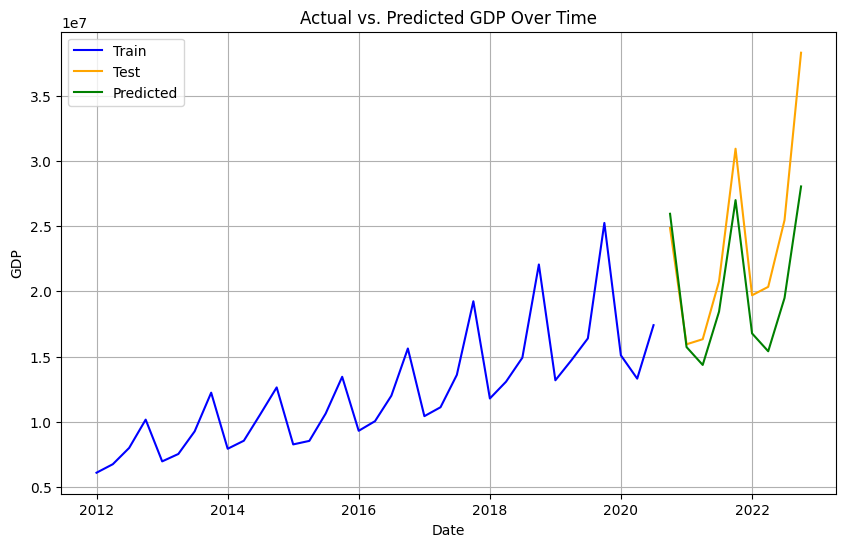

In [19]:
import warnings
warnings.filterwarnings('ignore')

gdp_ts = load_and_preprocess_data('GDP_data.csv', 'Date', 'Value')

results, train, test = fit_ets_model(gdp_ts, 0.8)

predictions = results.predict(start=test.index[0], end=test.index[-1])
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='GDP', title='Actual vs. Predicted GDP Over Time')

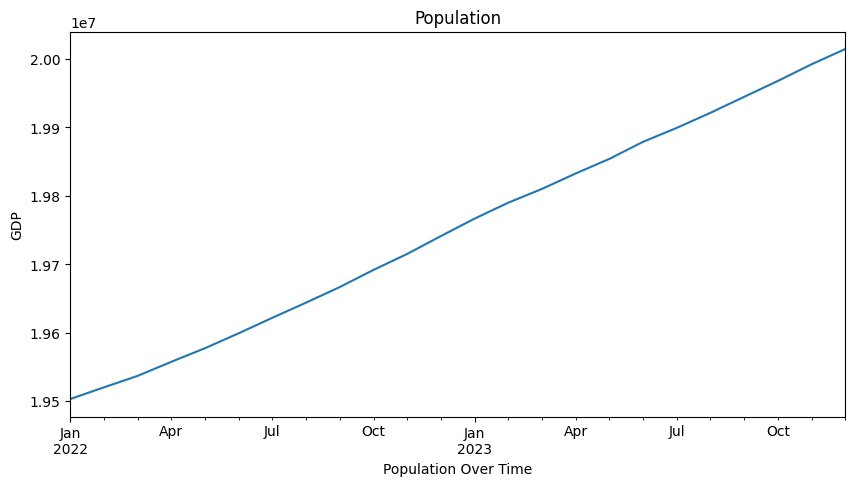

Mean Absolute Error (MAE): 1286.13
Mean Absolute Percentage Error (MAPE): 0.01%


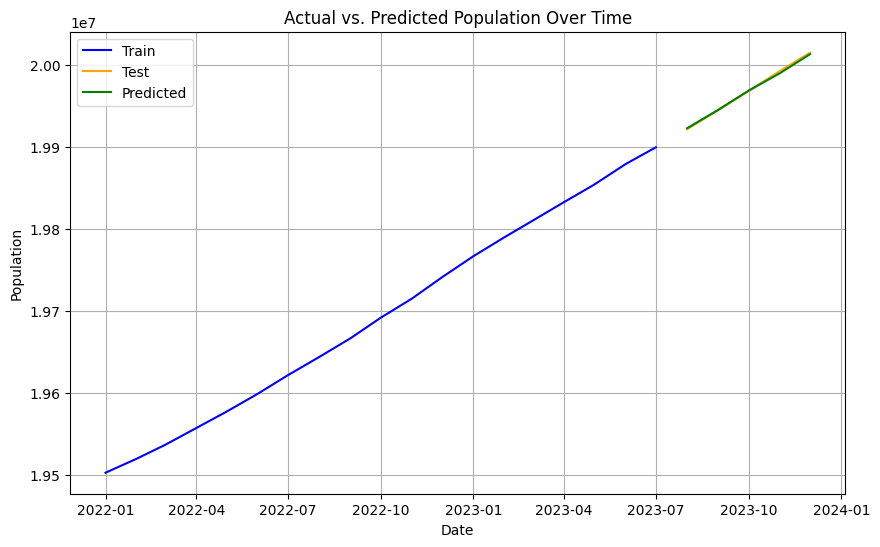

In [22]:
population_ts = load_and_preprocess_data('population_data.csv', 'Date', 'Value')
plot_time_series(population_ts, 'Population', 'Population Over Time')

results, train, test = fit_ets_model(population_ts, 0.8)

predictions = results.predict(start=test.index[0], end=test.index[-1])
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='Population', title='Actual vs. Predicted Population Over Time')


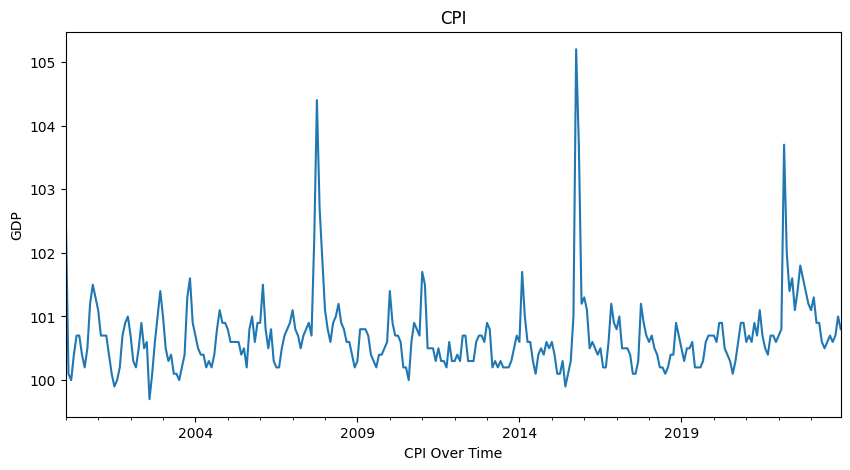

Mean Absolute Error (MAE): 0.95
Mean Absolute Percentage Error (MAPE): 0.94%


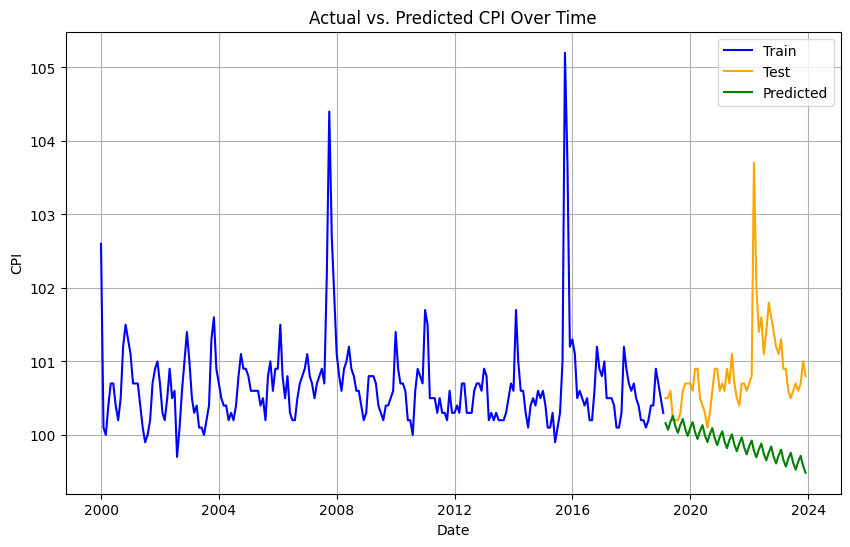

In [23]:
cpi_ts = load_and_preprocess_data('CPI_data.csv', 'Date', 'Value')
plot_time_series(cpi_ts, 'CPI', 'CPI Over Time')

results, train, test = fit_ets_model(cpi_ts, 0.8)

predictions = results.predict(start=test.index[0], end=test.index[-1])
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='CPI', title='Actual vs. Predicted CPI Over Time')


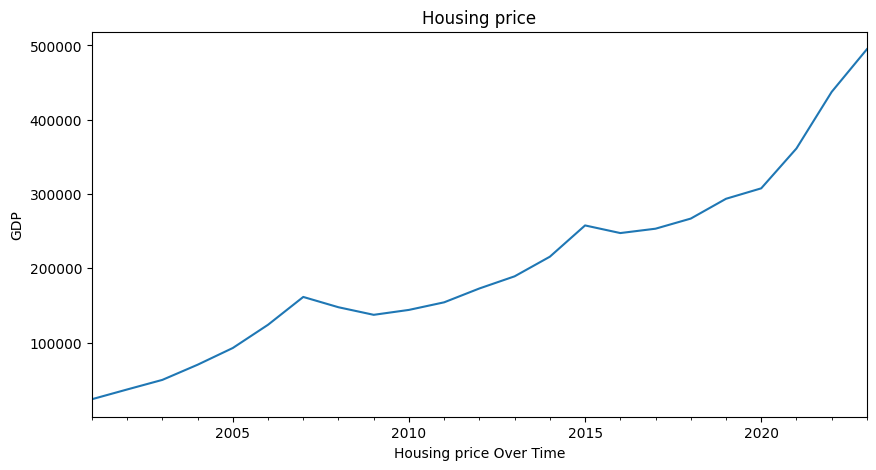

Mean Absolute Error (MAE): 73398.44
Mean Absolute Percentage Error (MAPE): 16.99%


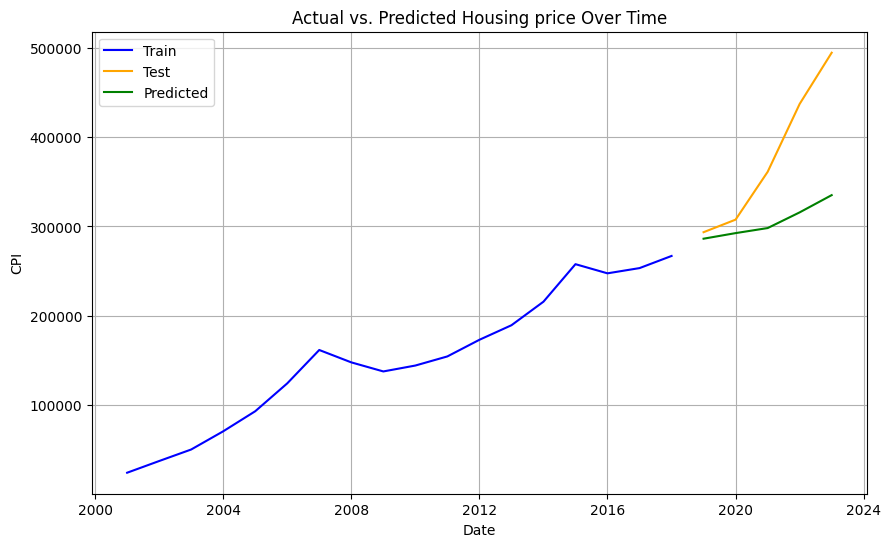

In [24]:
housing_ts = load_and_preprocess_data('housing_data.csv', 'Date', 'Value')
plot_time_series(housing_ts, 'Housing price', 'Housing price Over Time')

results, train, test = fit_ets_model(housing_ts, 0.8)

predictions = results.predict(start=test.index[0], end=test.index[-1])
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='CPI', title='Actual vs. Predicted Housing price Over Time')


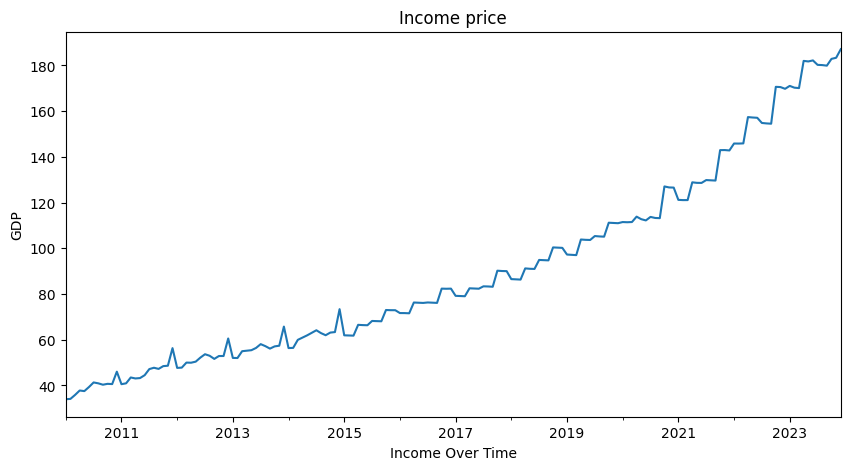

Mean Absolute Error (MAE): 15.80
Mean Absolute Percentage Error (MAPE): 9.39%


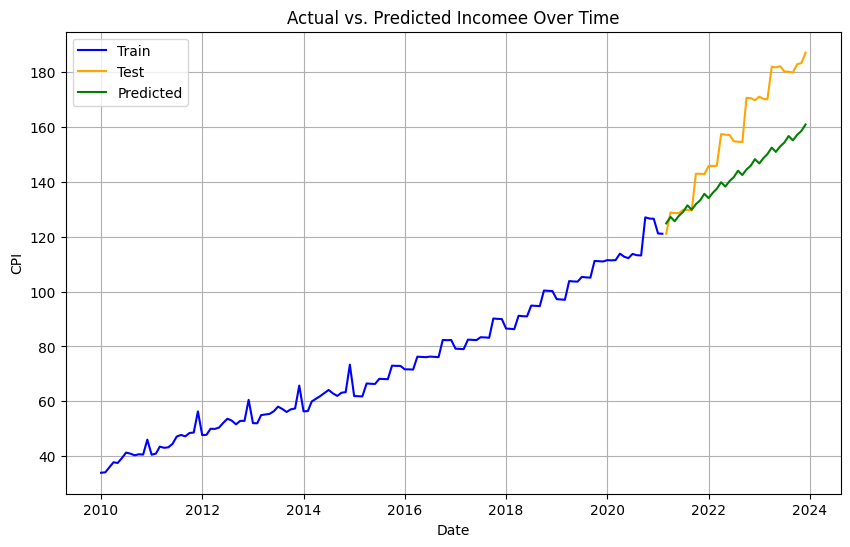

In [25]:
income_ts = load_and_preprocess_data('income_data.csv', 'Date', 'Value')
plot_time_series(income_ts, 'Income price', 'Income Over Time')

results, train, test = fit_ets_model(income_ts, 0.8)

predictions = results.predict(start=test.index[0], end=test.index[-1])
evaluate_forecast(test, predictions)

plot_forecast_results(train, test, predictions, ylabel='CPI', title='Actual vs. Predicted Incomee Over Time')
